## Knn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_training = pd.read_csv("../data_mod/train_motion_data.csv")
df_test = pd.read_csv("../data_mod/test_motion_data.csv")

df_training

,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0.101938,NORMAL,0.000000,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,0.135536,NORMAL,-1.624864,-1.082492,-0.812432,-0.541246
2,-0.594660,-0.122410,0.087888,NORMAL,1.030204,0.960082,-0.297330,-0.061205
3,0.738478,-0.228456,0.054902,NORMAL,1.333138,-0.106046,0.369239,-0.114228
4,0.101741,0.777568,0.054902,NORMAL,-0.636737,1.006023,0.050871,0.388784
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,-1.236468,SLOW,2.374675,-1.824629,0.457844,-1.008745
3640,-1.934203,0.914925,-0.477162,SLOW,-2.849891,2.932414,-0.967102,0.457462
3641,-0.222845,0.747304,0.054291,SLOW,1.711359,-0.167621,-0.111422,0.373652
3642,-0.349423,0.067261,-0.004963,SLOW,-0.126579,-0.680043,-0.174712,0.033630


In [3]:
df_training.isna().sum()

AccX        0
AccY        0
GyroZ       0
Class       0
DiffAccX    0
DiffAccY    0
VelX        0
VelY        0
dtype: int64

### Change categories to numbers

In [4]:
df_training = df_training.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_test = df_test.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_training

,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0.101938,0,0.000000,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,0.135536,0,-1.624864,-1.082492,-0.812432,-0.541246
2,-0.594660,-0.122410,0.087888,0,1.030204,0.960082,-0.297330,-0.061205
3,0.738478,-0.228456,0.054902,0,1.333138,-0.106046,0.369239,-0.114228
4,0.101741,0.777568,0.054902,0,-0.636737,1.006023,0.050871,0.388784
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,-1.236468,2,2.374675,-1.824629,0.457844,-1.008745
3640,-1.934203,0.914925,-0.477162,2,-2.849891,2.932414,-0.967102,0.457462
3641,-0.222845,0.747304,0.054291,2,1.711359,-0.167621,-0.111422,0.373652
3642,-0.349423,0.067261,-0.004963,2,-0.126579,-0.680043,-0.174712,0.033630


### Normalize the data

In [5]:
X_train = df_training.drop(columns=["Class"])
X_train = (X_train - X_train.mean()) / X_train.std() * 100

X_train["Class"] = df_training["Class"]
X_train

,AccX,AccY,GyroZ,DiffAccX,DiffAccY,VelX,VelY,Class
0,-4.105593,8.126800,81.244480,0.010300,-0.010421,-4.105593,8.126800,0
1,-168.957027,-111.696347,110.286351,-151.542377,-101.201825,-168.957027,-111.696347,0
2,-64.437130,-5.422989,69.099704,96.098456,89.738101,-64.437130,-5.422989,0
3,70.817107,-17.161393,40.585870,124.353421,-9.923577,70.817107,-17.161393,0
4,6.216602,94.197287,40.585870,-59.378806,94.032688,6.216602,94.197287,0
...,...,...,...,...,...,...,...,...
3639,88.795978,-215.193071,-1075.677828,221.498566,-170.576840,88.795978,-215.193071,2
3640,-200.341232,109.401604,-419.331681,-265.801873,274.111831,-200.341232,109.401604,2
3641,-26.714411,90.847295,40.057837,159.630443,-15.679652,-26.714411,90.847295,2
3642,-39.556507,15.572024,-11.161455,-11.795809,-63.580862,-39.556507,15.572024,2


In [6]:
X_testing = df_test.drop(columns="Class")
X_testing = (X_testing - X_testing.mean()) / X_testing.std() * 100

X_testing["Class"] = df_test["Class"]
X_testing

,AccX,AccY,GyroZ,DiffAccX,DiffAccY,VelX,VelY,Class
0,67.345100,-9.509000,-10.104756,-0.021340,-0.012385,-10.948927,14.564454,1
1,57.982946,10.303100,188.298737,-8.494392,16.758078,58.012497,10.295271,1
2,270.452050,-824.010358,-43.597957,192.270076,-706.238535,270.496822,-824.016540,1
3,229.805029,-828.171460,-55.972952,-36.808209,-3.534656,229.846889,-828.177633,1
4,283.133326,-732.402479,20.967248,48.242495,81.053740,283.179007,-732.408842,1
...,...,...,...,...,...,...,...,...
3079,-84.712435,-57.627689,445.483427,-73.609489,-1.097380,-84.693107,-57.635384,2
3080,145.444037,51.068429,-604.239195,208.277716,91.996249,145.479853,51.060520,2
3081,121.268079,-177.287100,-422.380477,-21.901364,-193.309813,121.302164,-177.294558,2
3082,83.265000,79.069807,347.559582,-34.415357,216.987532,83.296362,79.061842,2


### Balance data

Class 0: 1200
Class 1: 1113
Proportion: 1.08 : 1


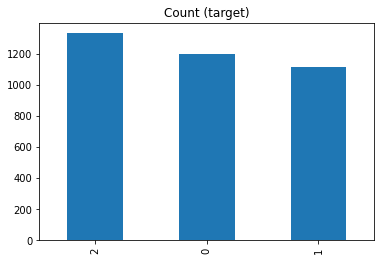

In [7]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
#X_rus, y_rus = rus.fit_resample(X_train.drop(columns="Class"), X_train["Class"])
X_rus, y_rus = X_train.drop(columns="Class"), X_train["Class"]

target_count = y_rus.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

## Train model

In [8]:
X_training  = X_rus
y_training  = y_rus

X_test = X_testing.drop(columns="Class")
y_test = X_testing.Class

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
Kneigh = KNeighborsClassifier(weights="uniform")

param_grid = {'n_neighbors': np.arange(1, 100), 'leaf_size': np.arange(20, 40)}

knn_gscv = GridSearchCV(Kneigh, param_grid, cv=5, verbose=10, n_jobs=10)
knn_gscv.fit(X_training, y_training)

Fitting 5 folds for each of 1980 candidates, totalling 9900 fits
[CV 1/5; 1/1980] START leaf_size=20, n_neighbors=1..............................
[CV 1/5; 1/1980] END leaf_size=20, n_neighbors=1;, score=0.376 total time=   0.0s
[CV 1/5; 3/1980] START leaf_size=20, n_neighbors=3..............................
[CV 2/5; 1/1980] START leaf_size=20, n_neighbors=1..............................
[CV 1/5; 3/1980] END leaf_size=20, n_neighbors=3;, score=0.370 total time=   0.0s
[CV 2/5; 1/1980] END leaf_size=20, n_neighbors=1;, score=0.336 total time=   0.0s
[CV 2/5; 3/1980] START leaf_size=20, n_neighbors=3..............................
[CV 4/5; 1/1980] START leaf_size=20, n_neighbors=1..............................
[CV 3/5; 1/1980] START leaf_size=20, n_neighbors=1..............................
[CV 2/5; 3/1980] END leaf_size=20, n_neighbors=3;, score=0.353 total time=   0.0s
[CV 4/5; 1/1980] END leaf_size=20, n_neighbors=1;, score=0.369 total time=   0.0s
[CV 3/5; 3/1980] START leaf_size=20, n_

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=10,
             param_grid={'leaf_size': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=10)

In [11]:
best_params = knn_gscv.best_params_
best_params

{'leaf_size': 20, 'n_neighbors': 27}

In [12]:
knn_gscv.best_score_

0.4168532085198752

In [13]:
knn_gscv.score(X_training, y_training)

0.49121844127332603

In [14]:
knn_gscv.score(X_test, y_test)

0.4393644617380026

In [15]:
classes = ["NORMAL", "AGGRESSIVE", "SLOW"]

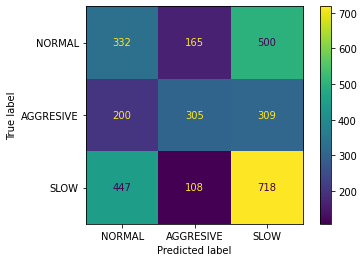

In [16]:
y_pred = knn_gscv.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=classes)
display.plot()

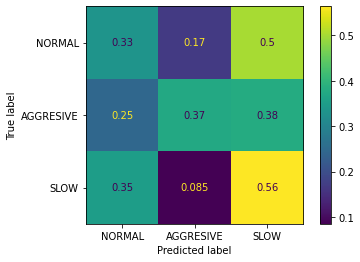

In [17]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=classes)
display.plot()

In [18]:
from sklearn.ensemble import BaggingClassifier

knn_bagging = BaggingClassifier(knn_gscv.best_estimator_, max_samples=0.8, max_features=0.7, random_state=0)
knn_bagging.fit(X_training, y_training)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=20,
                                                      n_neighbors=27),
                  max_features=0.7, max_samples=0.8, random_state=0)

In [19]:
knn_bagging.score(X_training, y_training)

0.5120746432491767

In [20]:
knn_bagging.score(X_test, y_test)

0.4400129701686122

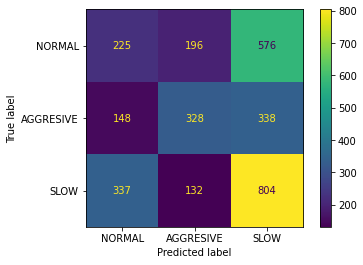

In [21]:
y_pred = knn_bagging.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=classes)
display.plot()

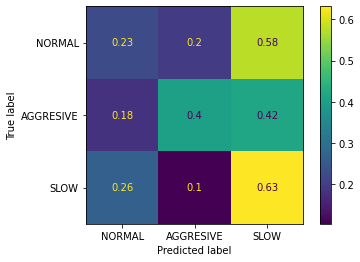

In [22]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=classes)
display.plot()

In [23]:
def evaluate(model, test_features, test_labels):
    accuracy = model.score(test_features, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    
    return accuracy

bagging_accuracy = evaluate(knn_bagging, X_test, y_test)

best_random = knn_gscv.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print(f'Improvement of {100 * (bagging_accuracy - random_accuracy) / random_accuracy:.3f}%.')

Model Performance
Accuracy = 0.440%.
Model Performance
Accuracy = 0.439%.
Improvement of 0.148%.


### Save the model

In [25]:
import joblib

filename = 'trained_models/knn_bagging.sav'
joblib.dump(knn_bagging, filename)

loaded_model = joblib.load(filename)